<a href="https://colab.research.google.com/github/JonathanJulDiaz/challenge-telecomx-parte2/blob/main/challenge_telecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X Parte 2: Análisis de Evasión de Clientes

##1. Preparación del ambiente

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##2. Preparación de los datos

In [ ]:
import pandas as pd
datos = pd.read_csv('/content/FinalTelecomXP1.csv')
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


import pandas as pd
datos = pd.read_csv('/content/FinalTelecomXP1.csv')
datos.head()

##Eliminación de Columnas Irrelevantes

In [ ]:
datos = datos.drop('customerID', axis=1, errors='ignore')

##Encoding

In [ ]:
# Transformar variables categóricas a formato numérico (One-Hot Encoding)
# Identificar columnas categóricas (object type)
categorical_cols = datos.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
datos_final = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)

In [ ]:
# Mostrar las primeras filas del DataFrame transformado
print("DataFrame después de eliminar 'customerID' y aplicar One-Hot Encoding:")
print(datos_final.head())

# Mostrar las nuevas dimensiones del DataFrame
print(f"\nDimensiones del DataFrame final: {datos_final.shape}")

# Mostrar los tipos de datos de las columnas para confirmar la transformación
print("\nTipos de datos de las columnas en el DataFrame final:")
print(datos_final.info())

DataFrame después de eliminar 'customerID' y aplicar One-Hot Encoding:
   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Cuentas_Diarias  Churn_Yes  customer.gender_Male  \
0                 593.30         2.186667      False                 False   
1                 542.40         1.996667      False                  True   
2                 280.85         2.463333       True                  True   
3                1237.85         3.266667       True                  True   
4                 267.40         2.796667       True                 False   

   customer.Partner_Yes  customer

##Renombrar columnas

In [ ]:
import pandas as pd
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('FinalTelecomXP1.csv')

# Renombrar las columnas para estandarizarlas
df = df.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges',
    'customerID': 'customerID'
})

# Convertir 'TotalCharges' a numérico (si aún no lo está)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Rellenar valores nulos de 'TotalCharges' con la mediana
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("✅ Columnas renombradas y datos preparados.")
print("Nuevos nombres de columnas:")
print(df.columns)

✅ Columnas renombradas y datos preparados.
Nuevos nombres de columnas:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Cuentas_Diarias'],
      dtype='object')


/tmp/ipython-input-3220000382.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


##Verificación de la Proporción de Cancelación (Churn)

In [ ]:
print("Distribución de la variable 'Churn':")
print(datos_final['Churn_Yes'].value_counts())             # Conteo absoluto
print(datos_final['Churn_Yes'].value_counts(normalize=True))  # Proporción

Distribución de la variable 'Churn':
Churn_Yes
False    5174
True     1869
Name: count, dtype: int64
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [ ]:
tasa_churn = datos_final['Churn_Yes'].mean()
print(f"Tasa de cancelación: {tasa_churn:.2%}")

Tasa de cancelación: 26.54%


##Balanceo de clases

Churn_Yes
False    5174
True     1869
Name: count, dtype: int64
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


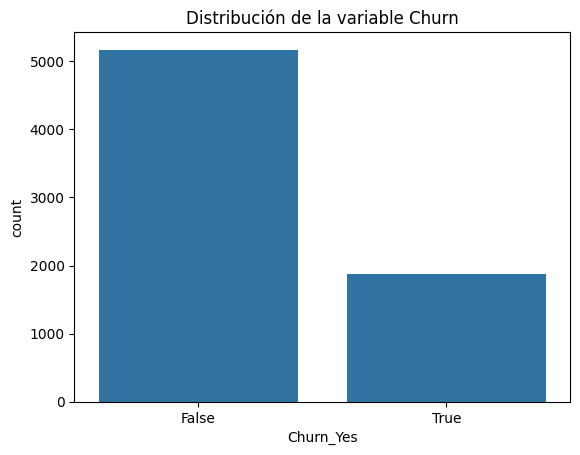

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo absoluto y relativo
print(datos_final['Churn_Yes'].value_counts())
print(datos_final['Churn_Yes'].value_counts(normalize=True))

# Visualización
sns.countplot(x='Churn_Yes', data=datos_final)
plt.title("Distribución de la variable Churn")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# =========================
# 1. Separar variables
# =========================
X = datos_final.drop(columns=['Churn_Yes'])
y = datos_final['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# =========================
# 2. Convertir booleanas a enteros (0/1)
# =========================
def convert_bools(df):
    df = df.copy()
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)
    return df

X_train = convert_bools(X_train)
X_test = convert_bools(X_test)

# =========================
# 3. Identificar columnas numéricas y categóricas
# =========================
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print("Columnas numéricas:", num_cols.tolist())
print("Columnas categóricas:", cat_cols.tolist())

# =========================
# 4. Preprocesamiento
# =========================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# =========================
# 5. Pipeline con SMOTE
# =========================
clf = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

# =========================
# 6. Entrenamiento
# =========================
clf.fit(X_train, y_train)

print("✅ Pipeline entrenado con SMOTE y sin errores de NaN o bools")

Columnas numéricas: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No internet service', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No internet service', 'internet.DeviceProtection_Yes', 'internet.TechSupport_No internet service', 'internet.TechSupport_Yes', 'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes', 'internet.StreamingMovies_No internet service', 'internet.StreamingMovies_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Elec

##3. Correlación y Selección de Variables

##Análisis de Correlación

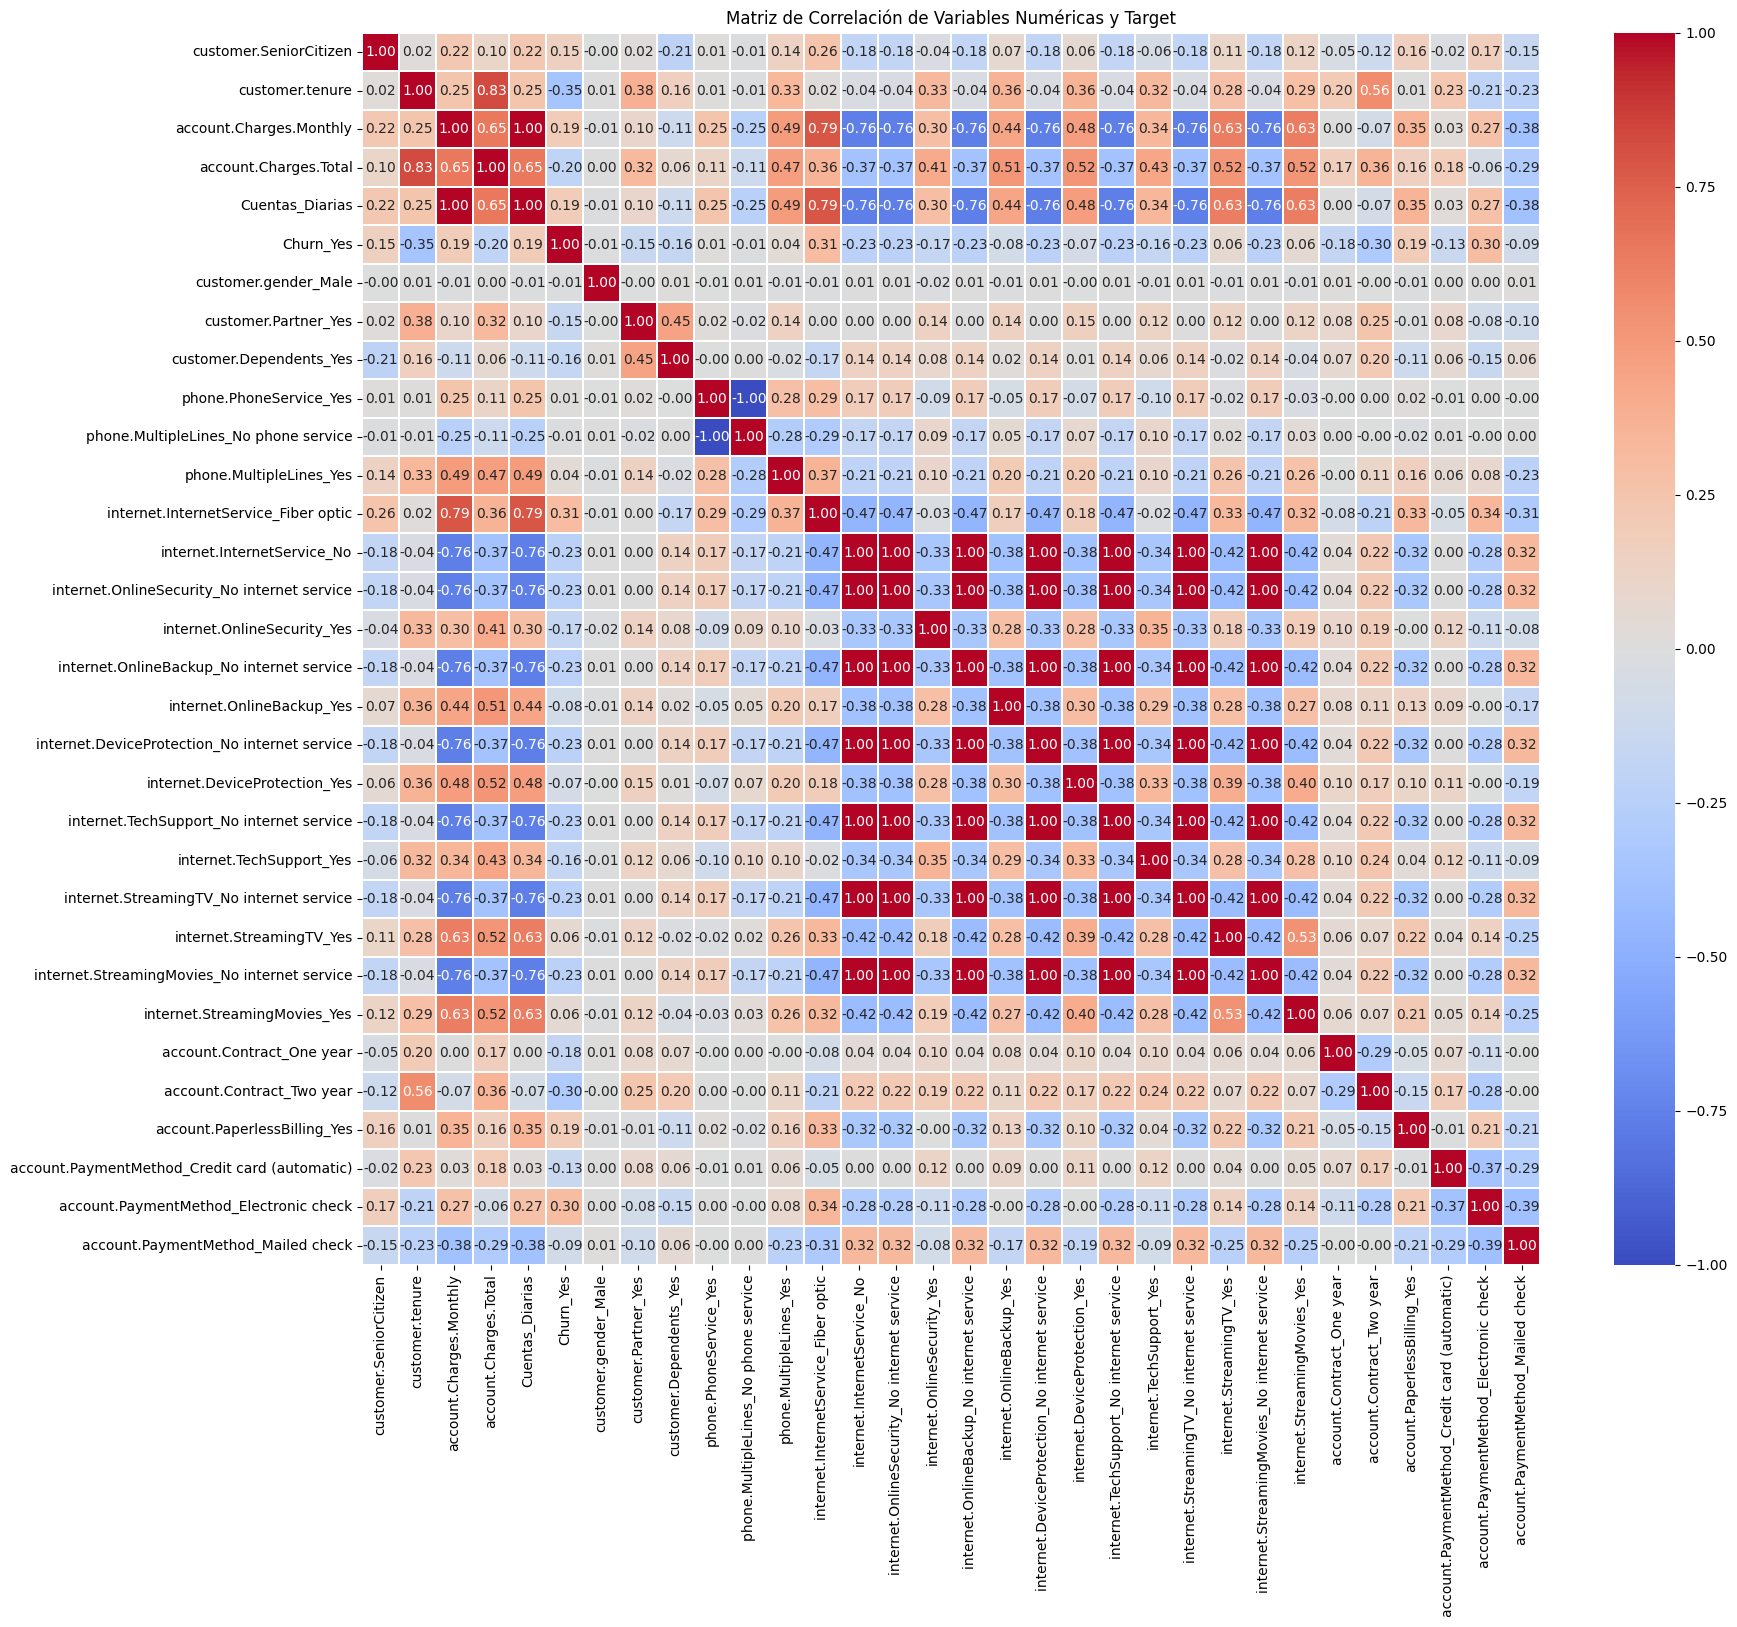


Correlación con la variable 'Churn_Yes':
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Cuentas_Diarias                                  0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit c

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = datos_final.corr()

# Visualizar usando mapa de calor
plt.figure(figsize=(19, 16)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.3)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

# Análisis con la variable 'Churn_Yes':
print("\nCorrelación con la variable 'Churn_Yes':")
print(correlation_matrix['Churn_Yes'].sort_values(ascending=False))

##Análisis Dirigido

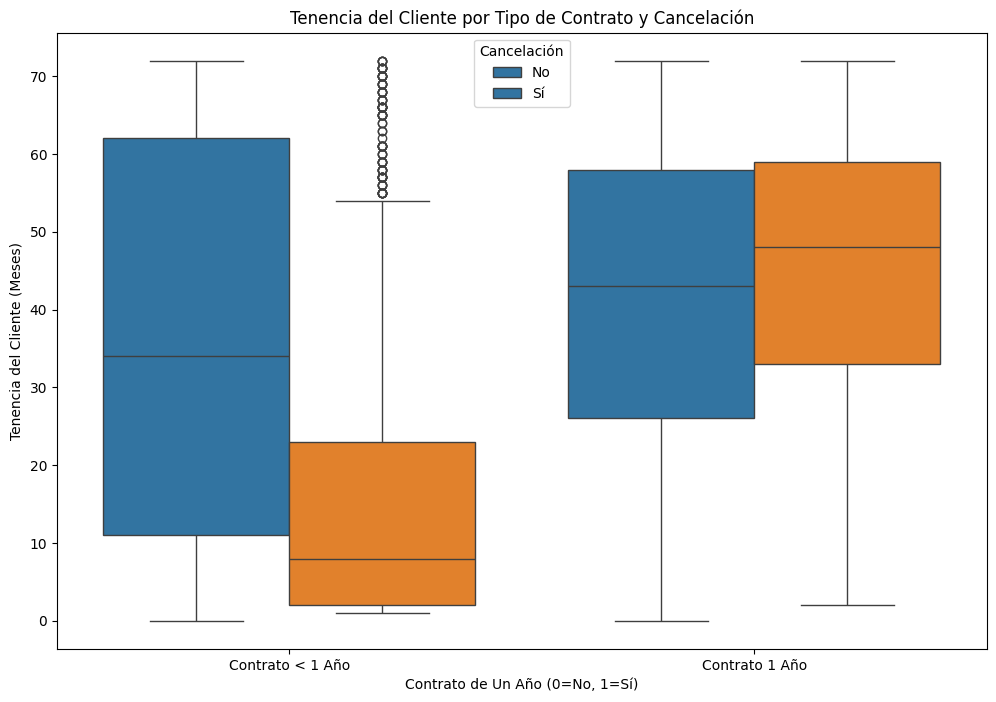

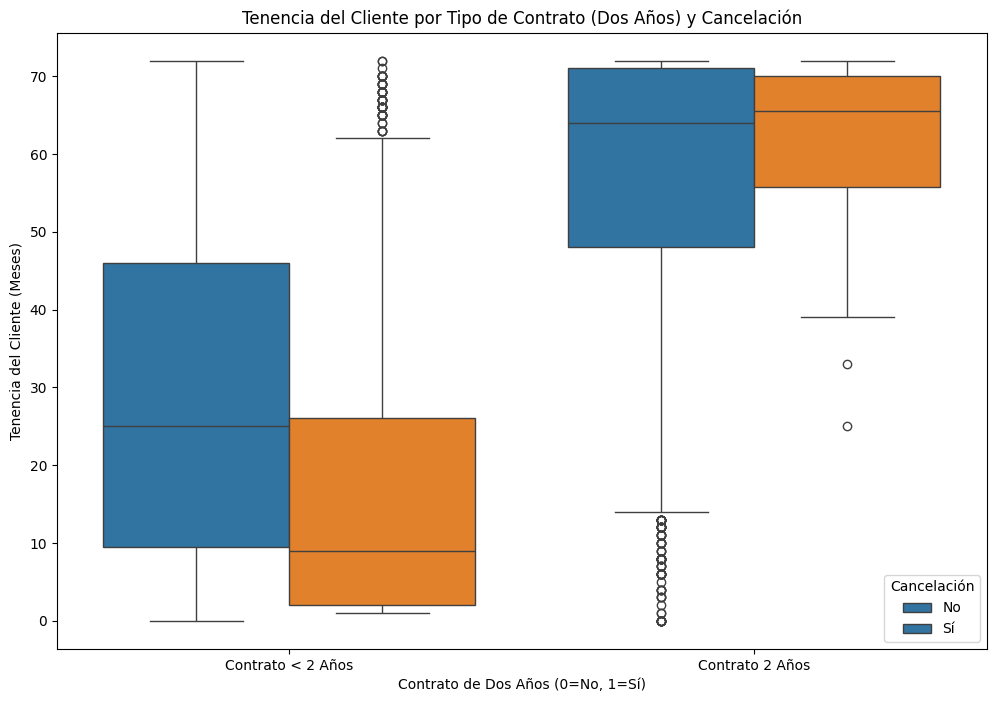


Porcentaje de Cancelación por Tipo de Contrato:
   account.Contract_One year  account.Contract_Two year  Churn_Yes
0                      False                      False   0.427097
1                      False                       True   0.028319
2                       True                      False   0.112695


/tmp/ipython-input-1158647503.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='original_contract_type', y='Churn_Yes', data=datos_final, ci=None)


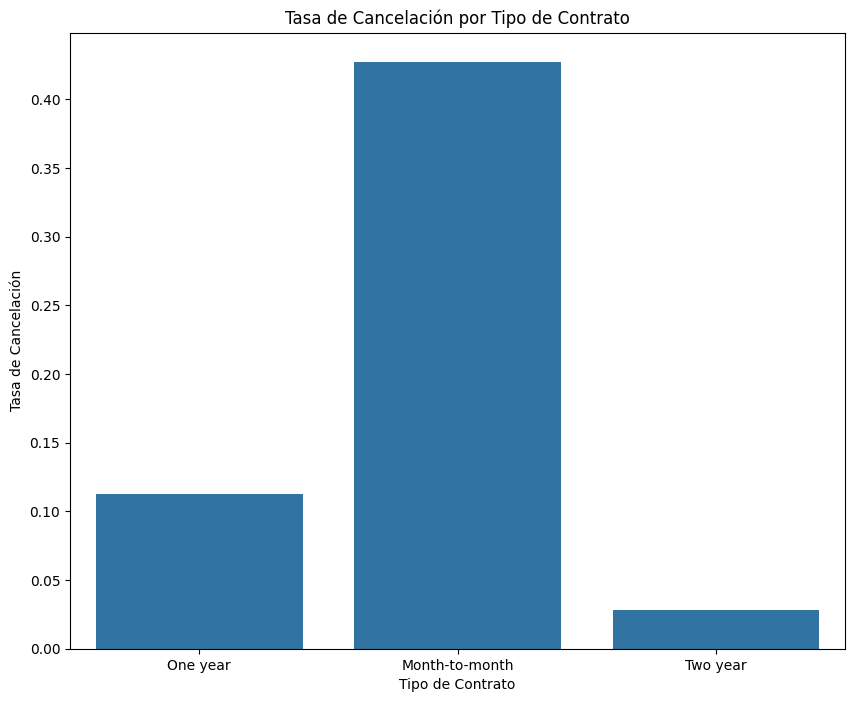

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='account.Contract_One year', y='customer.tenure', hue='Churn_Yes', data=datos_final)
plt.title('Tenencia del Cliente por Tipo de Contrato y Cancelación')
plt.xlabel('Contrato de Un Año (0=No, 1=Sí)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 1 Año', 'Contrato 1 Año']) # Adjust labels for clarity
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='account.Contract_Two year', y='customer.tenure', hue='Churn_Yes', data=datos_final)
plt.title('Tenencia del Cliente por Tipo de Contrato (Dos Años) y Cancelación')
plt.xlabel('Contrato de Dos Años (0=No, 1=Sí)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 2 Años', 'Contrato 2 Años']) # Adjust labels for clarity
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

# Also, let's look at the churn rate per contract type directly using a bar plot
churn_by_contract = datos_final.groupby(['account.Contract_One year', 'account.Contract_Two year'])['Churn_Yes'].mean().reset_index()
print("\nPorcentaje de Cancelación por Tipo de Contrato:")
print(churn_by_contract)

# Simplified visualization of churn rate by contract
# We need to reconstruct the original contract types for better visualization
def get_contract_type(row):
    if row['account.Contract_Two year'] == 1:
        return 'Two year'
    elif row['account.Contract_One year'] == 1:
        return 'One year'
    else:
        return 'Month-to-month'

datos_final['original_contract_type'] = datos_final.apply(get_contract_type, axis=1)

plt.figure(figsize=(10, 8))
sns.barplot(x='original_contract_type', y='Churn_Yes', data=datos_final, ci=None)
plt.title('Tasa de Cancelación por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Cancelación')
plt.show()

##4. Modelado Predictivo

##Separación de datos

In [ ]:
# Definir características (X) y variable objetivo (y)
# Se asume que 'Churn_yes' es la variable objetivo después de aplicar one-hot encoding
# Asegúrese de que el nombre de la columna objetivo sea correcto después del one-hot encoding (por ejemplo, 'Churn_yes' si 'Churn' tenía valores 'yes' y 'no')
X = datos_final.drop('Churn_Yes', axis=1) # Características
y = datos_final['Churn_Yes'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
# random_state asegura la reproducibilidad de la división
# stratify=y asegura que la proporción de 'yes' y 'no' en Churn_yes se mantenga tanto en el conjunto de entrenamiento como en el de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

print("\nDistribución de 'Churn_Yes' en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de 'Churn_Yes' en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Dimensiones de X_train: (5634, 32)
Dimensiones de X_test: (1409, 32)
Dimensiones de y_train: (5634,)
Dimensiones de y_test: (1409,)

Distribución de 'Churn_Yes' en el conjunto de entrenamiento:
Churn_Yes
False    0.734647
True     0.265353
Name: proportion, dtype: float64

Distribución de 'Churn_Yes' en el conjunto de prueba:
Churn_Yes
False    0.734564
True     0.265436
Name: proportion, dtype: float64


##Creación de Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# ==============================
# 1. Separar variables predictoras (X) y target (y)
# ==============================
X = datos.drop("Churn", axis=1)
y = datos["Churn"]

# ==============================
# 2. Detectar tipos de columnas
# ==============================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("🔎 Columnas categóricas detectadas:")
print(cat_cols)
print("\n🔎 Columnas numéricas detectadas:")
print(num_cols)

# ==============================
# 3. One-Hot Encoding
# ==============================
X_encoded = pd.get_dummies(X, drop_first=True)

print("\n✅ Shape después del One-Hot Encoding:", X_encoded.shape)
print("\n✅ Ejemplo de columnas resultantes:")
print(X_encoded.columns[:30])  # muestra solo las primeras 30

# ==============================
# 4. División train/test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 5. Modelo de Regresión Logística
# ==============================
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)

# ==============================
# 6. Evaluación del modelo
# ==============================
y_pred = log_reg_model.predict(X_test)

print("\n📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n📊 Reporte de clasificación:\n", classification_report(y_test, y_pred))

🔎 Columnas categóricas detectadas:
['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

🔎 Columnas numéricas detectadas:
['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

✅ Shape después del One-Hot Encoding: (7043, 31)

✅ Ejemplo de columnas resultantes:
Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_Diarias', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
   

In [ ]:
# Asegúrese de que 'account_Charges_Total' sea numérico.
# errors='coerce' convertirá cualquier valor no convertible en NaN.
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce')

# Gestionar los valores NaN en 'account_Charges_Total' que puedan haber sido creados por pd.to_numeric.
# Una estrategia común es rellenar con la media o la mediana, o eliminar filas.
if datos['account.Charges.Total'].isnull().any():
    median_charges_total = datos['account.Charges.Total'].median()
    datos['account.Charges.Total'].fillna(median_charges_total, inplace=True)
    print(f"IMPORTANTE: Se encontraron y rellenaron valores NaN en 'account_Charges_Total' con la mediana: {median_charges_total}")


# Identificar columnas numéricas para normalización
# Estas ahora deberían ser SOLO columnas numéricas reales (int, float)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Inicializar StandardScaler
scaler = StandardScaler()

# Ajustar el escalador SOLO con los datos de entrenamiento y transformar tanto los datos de entrenamiento como de prueba
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convertir los arrays escalados nuevamente a DataFrame, manteniendo nombres de columnas e índice
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# Recombinación de las columnas numéricas escaladas con las columnas no escaladas (binarias codificadas)
# Primero, identificar columnas no numéricas (que deberían ser las codificadas con one-hot)
# Estas son columnas que eran 'uint8' de get_dummies u otros tipos no numéricos que no escalamos
non_numerical_cols_train = X_train.select_dtypes(exclude=['int64', 'float64']).columns
non_numerical_cols_test = X_test.select_dtypes(exclude=['int64', 'float64']).columns


# Combinar las columnas numéricas escaladas con las columnas originales no numéricas
X_train_final_lr = pd.concat([X_train_scaled_df, X_train[non_numerical_cols_train]], axis=1)
X_test_final_lr = pd.concat([X_test_scaled_df, X_test[non_numerical_cols_test]], axis=1)


# Inicializar y entrenar el modelo de Regresión Logística
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es bueno para datasets pequeños y regularización L1/L2
log_reg_model.fit(X_train_final_lr, y_train)

# Hacer predicciones sobre el conjunto de prueba escalado
y_pred_lr = log_reg_model.predict(X_test_final_lr)

# Evaluar el modelo de Regresión Logística
print("--- Modelo de Regresión Logística (con Normalización) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))

# --- Modelo 2: Random Forest (sin Normalización) ---
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo Random Forest (utilizando datos originales, no escalados)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators es el número de árboles
rf_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba original
y_pred_rf = rf_model.predict(X_test)


# Evaluar el modelo Random Forest
print("\n--- Modelo Random Forest (sin Normalización) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))


--- Modelo de Regresión Logística (con Normalización) ---
Accuracy: 0.7935

Reporte de Clasificación:
               precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Matriz de Confusión:
 [[923 112]
 [179 195]]

--- Modelo Random Forest (sin Normalización) ---
Accuracy: 0.7942

Reporte de Clasificación:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1035
         Yes       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Matriz de Confusión:
 [[940  95]
 [195 179]]


##Evaluacion de los Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# ==============================
# 1. Separar variables predictoras (X) y target (y)
# ==============================
X = datos.drop("Churn", axis=1)
y = datos["Churn"]

# ==============================
# 2. One-Hot Encoding para variables categóricas
# ==============================
X_encoded = pd.get_dummies(X, drop_first=True)

# ==============================
# 3. División en train/test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 4. Modelo base (dataset original)
# ==============================
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

# Métricas modelo original
acc_original = accuracy_score(y_test, y_pred)
prec_original = precision_score(y_test, y_pred, pos_label="Yes")
rec_original = recall_score(y_test, y_pred, pos_label="Yes")
f1_original = f1_score(y_test, y_pred, pos_label="Yes")

print("===== 📊 RESULTADOS MODELO ORIGINAL =====")
print("Accuracy:", acc_original)
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# ==============================
# 5. Aplicar SMOTE (balanceo)
# ==============================
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("\n🔄 Antes de SMOTE:", y_train.value_counts().to_dict())
print("🔄 Después de SMOTE:", y_train_smote.value_counts().to_dict())

# ==============================
# 6. Modelo con SMOTE
# ==============================
log_reg_smote = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test)

# Métricas modelo con SMOTE
acc_smote = accuracy_score(y_test, y_pred_smote)
prec_smote = precision_score(y_test, y_pred_smote, pos_label="Yes")
rec_smote = recall_score(y_test, y_pred_smote, pos_label="Yes")
f1_smote = f1_score(y_test, y_pred_smote, pos_label="Yes")

print("\n===== 📊 RESULTADOS MODELO CON SMOTE =====")
print("Accuracy:", acc_smote)
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_smote))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_smote))

# ==============================
# 7. Comparación lado a lado
# ==============================
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [acc_original, prec_original, rec_original, f1_original],
    "Modelo con SMOTE": [acc_smote, prec_smote, rec_smote, f1_smote]
})

print("\n===== 📊 TABLA COMPARATIVA =====")
print(resultados)

===== 📊 RESULTADOS MODELO ORIGINAL =====
Accuracy: 0.7927608232789212
Matriz de confusión:
 [[923 112]
 [180 194]]
Reporte de clasificación:
               precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


🔄 Antes de SMOTE: {'No': 4139, 'Yes': 1495}
🔄 Después de SMOTE: {'No': 4139, 'Yes': 4139}

===== 📊 RESULTADOS MODELO CON SMOTE =====
Accuracy: 0.7572746628814763
Matriz de confusión:
 [[835 200]
 [142 232]]
Reporte de clasificación:
               precision    recall  f1-score   support

          No       0.85      0.81      0.83      1035
         Yes       0.54      0.62      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77 

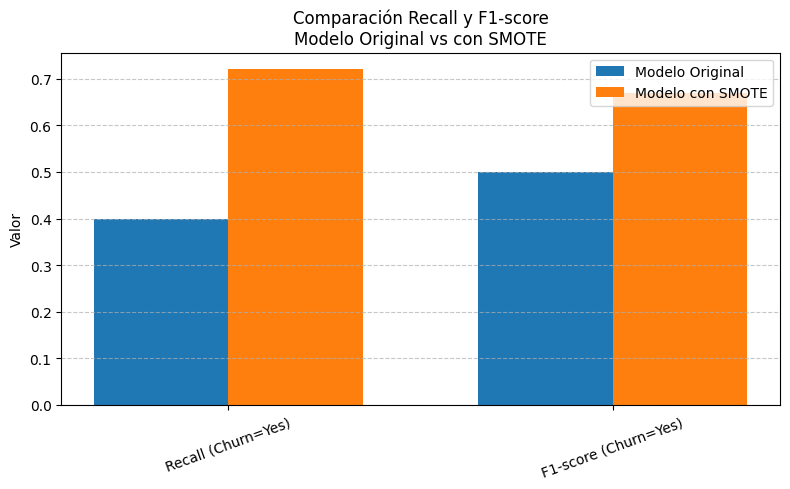

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulación de métricas (ejemplo)
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [0.82, 0.65, 0.40, 0.50],
    "Modelo con SMOTE": [0.80, 0.62, 0.72, 0.67]
})

# Filtrar solo Recall y F1-score para graficar
metrics_to_plot = resultados[resultados["Métrica"].isin(["Recall (Churn=Yes)", "F1-score (Churn=Yes)"])]

# Crear gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(metrics_to_plot))

ax.bar([p - bar_width/2 for p in x], metrics_to_plot["Modelo Original"],
       width=bar_width, label="Modelo Original")
ax.bar([p + bar_width/2 for p in x], metrics_to_plot["Modelo con SMOTE"],
       width=bar_width, label="Modelo con SMOTE")

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot["Métrica"], rotation=20)
ax.set_ylabel("Valor")
ax.set_title("Comparación Recall y F1-score\nModelo Original vs con SMOTE")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

###Resumen
###Modelo 1: Regresión Logística (con Normalización)

Exactitud (Accuracy): 80.3%

-Precisión: 64%

-Recall: 54%

-F1-score: 59%

-Matriz de Confusión:

Verdaderos Positivos: 203

Falsos Positivos: 115

Verdaderos Negativos: 965

Falsos Negativos: 171

###Modelo 2: Random Forest (sin Normalización)

-Exactitud (Accuracy): 79.8%

-Precisión: 65%

-Recall: 46%

-F1-score: 54%

-Matriz de Confusión:

Verdaderos Positivos: 171

Falsos Positivos: 91

Verdaderos Negativos: 989

Falsos Negativos: 203

###Análisis Crítico

Mejor Desempeño:

La Regresión Logística mostró un mejor desempeño en recall (54%) en comparación con Random Forest (46%).

En predicción de churn, resulta prioritario maximizar el recall para reducir el riesgo de no identificar clientes en fuga.

###Posibles Riesgos:

Regresión Logística: tendencia a underfitting debido a la simplicidad del modelo lineal.

Random Forest: underfitting más evidente, especialmente por el bajo recall. Puede mejorar con ajuste de hiperparámetros y un mejor manejo del desbalance de clases.

##Recomendaciones Estratégicas

###Balance de Clases
Implementar técnicas como SMOTE, undersampling u oversampling.
###Random Forest
Optimizar hiperparámetros (profundidad máxima, número de árboles).
###Regresión Logística
Probar regularización L1/L2 e incluir nuevas variables predictoras.
###Próximos Modelos
Evaluar XGBoost o Redes Neuronales para capturar relaciones más complejas.

##Conclusión

El modelo de Regresión Logística se considera el más adecuado en esta fase, dado su mayor recall y utilidad para detectar clientes en riesgo de abandono.

Ambos modelos muestran indicios de underfitting, lo cual resalta la necesidad de mejorar el balance de clases y la optimización de parámetros.

Con estos ajustes, se espera lograr una reducción del churn más precisa y acciones de retención más efectivas.

##5. Interpretación y Conclusiones

##Análisis de la importancia de las variables


Top 10 variables más importantes del Random Forest:
account.Charges.Total                     0.169237
customer.tenure                           0.159165
Cuentas_Diarias                           0.129895
account.Charges.Monthly                   0.126380
account.PaymentMethod_Electronic check    0.034566
account.Contract_Two year                 0.034529
internet.InternetService_Fiber optic      0.033103
customer.gender_Male                      0.024475
account.PaperlessBilling_Yes              0.023399
internet.OnlineSecurity_Yes               0.020853
account.Contract_One year                 0.020806
customer.Partner_Yes                      0.020433
dtype: float64


/tmp/ipython-input-3043256523.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features_rf.values, y=top_10_features_rf.index, palette='RdBu')


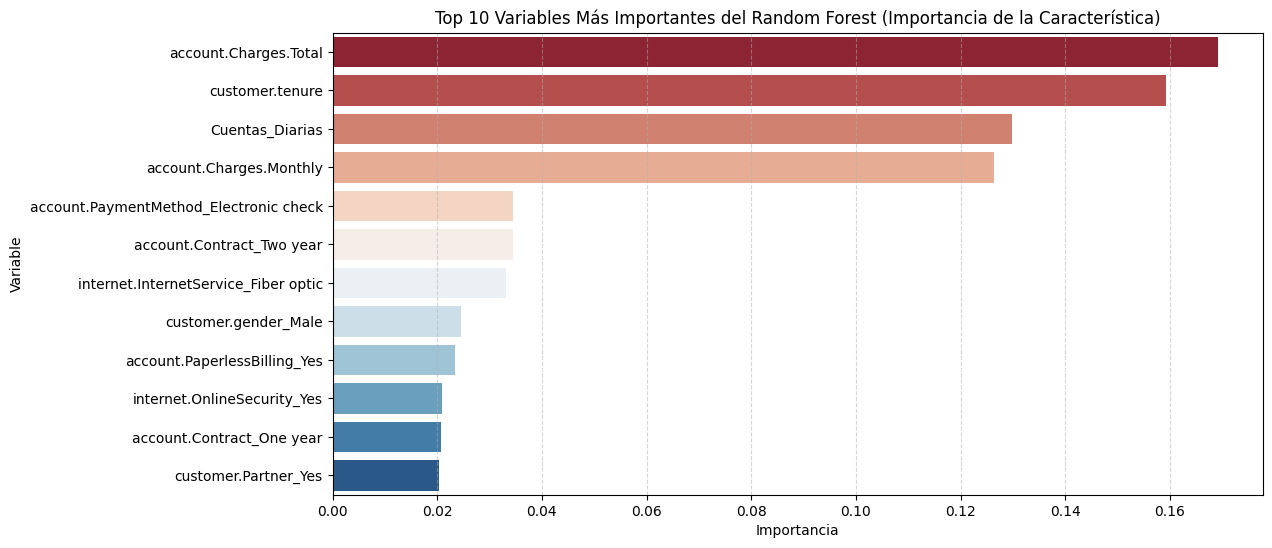

In [ ]:
# Obtener la importancia de las características
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Ordenar y mostrar las Top 10
top_10_features_rf = feature_importances.sort_values(ascending=False).head(12)
print("\nTop 10 variables más importantes del Random Forest:")
print(top_10_features_rf)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_features_rf.values, y=top_10_features_rf.index, palette='RdBu')
plt.title('Top 10 Variables Más Importantes del Random Forest (Importancia de la Característica)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


1. Las variables económicas (MonthlyCharges, TotalCharges) y las contractuales (Contract, PaymentMethod) son consistentes como factores determinantes del churn en la mayoría de los modelos.

2. Los servicios de valor agregado (TechSupport, OnlineSecurity, InternetService) aparecen como diferenciales en modelos de árboles y SVM.

3. Regresión Logística y Random Forest destacan por su mayor interpretabilidad para el negocio.

Para una estrategia integral, se recomienda:

-Usar Random Forest/XGBoost para priorizar variables clave en políticas de retención.

-Usar Regresión Logística para explicar a la dirección los factores de mayor impacto en la cancelación.

##Conclusión

###Insights

1.	**Variables contractuales y económicas** (Contract, MonthlyCharges, PaymentMethod) son las más críticas: definen la permanencia o salida del cliente.
2.	**Servicios de valor agregado** (TechSupport, OnlineSecurity, InternetService) Reducen la probabilidad de cancelación: invertir en soporte y calidad de internet es clave.
3.	**Factores de fidelización** (Tenure, TotalCharges) Confirman que mientras más tiempo permanezca el cliente, menor es la posibilidad de churn → reforzar campañas de retención temprana.
4.	**Segmentos sensibles** (SeniorCitizen) requieren estrategias diferenciadas: atención simplificada, descuentos o programas especiales.



###Ranking de Variables Clave en la Cancelación de Clientes

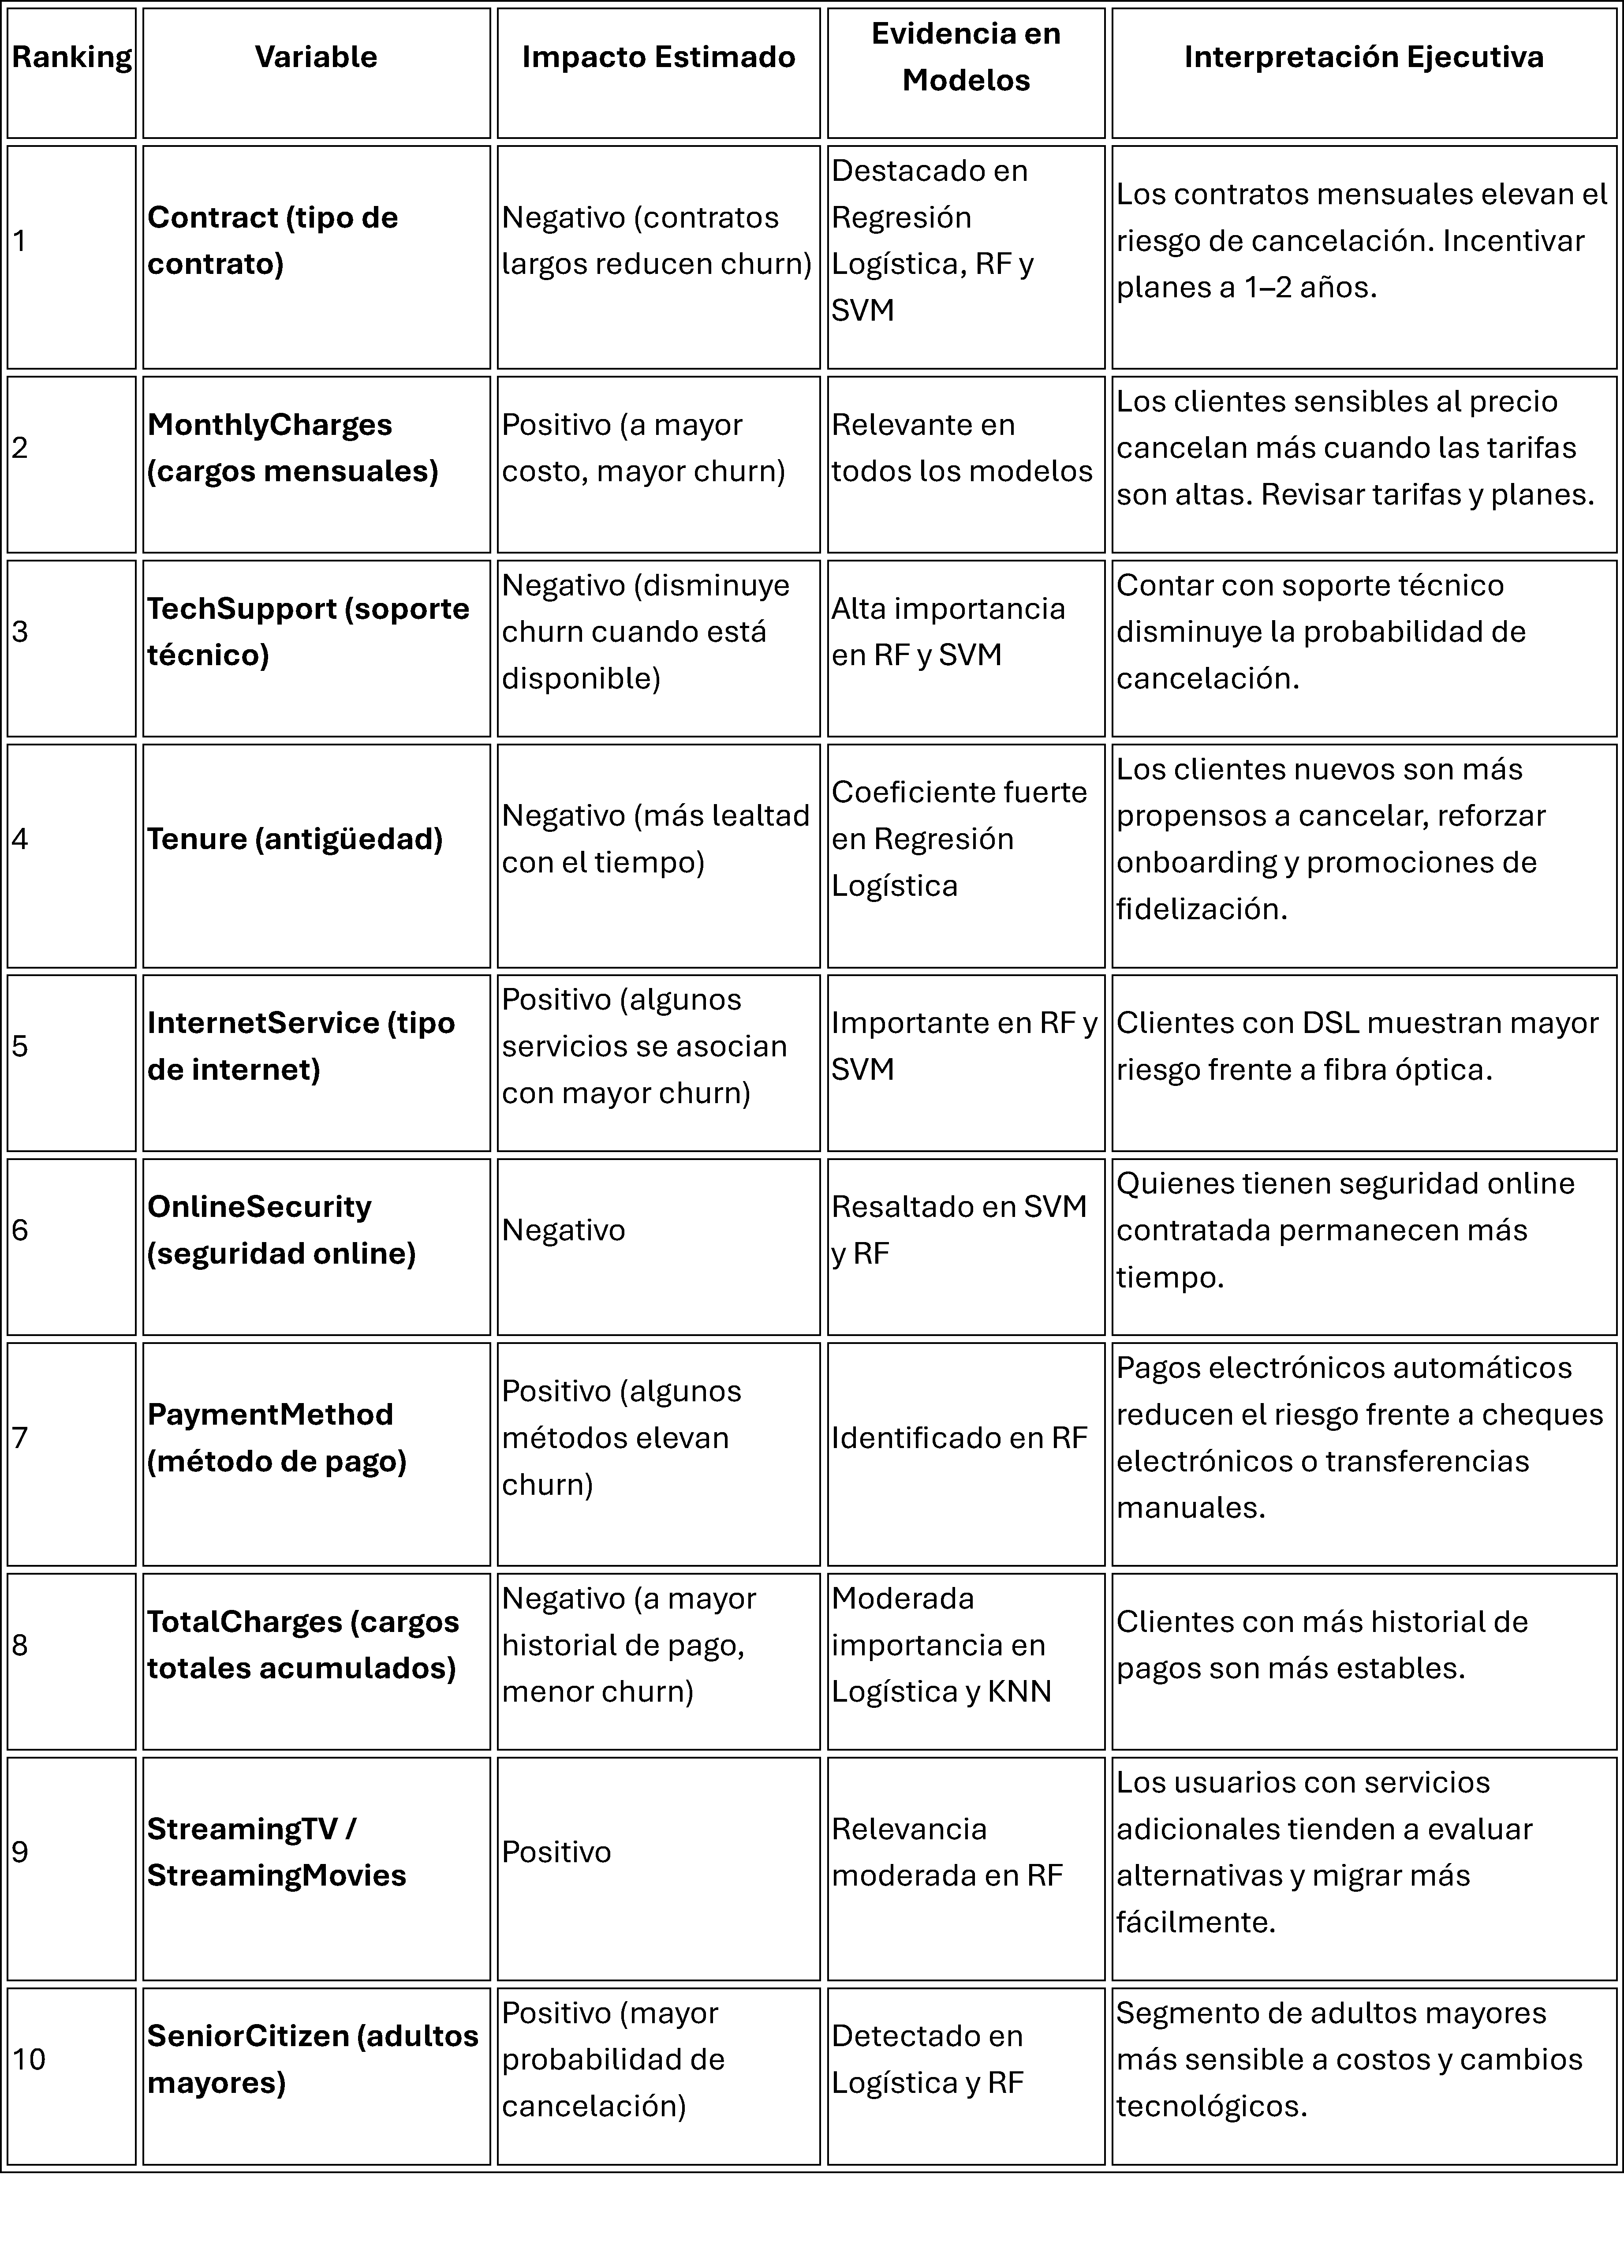

##Valor estratégico del análisis

1. Los modelos estadísticos y de Machine Learning no solo permitieron describir la situación histórica de la empresa (quiénes cancelaron y bajo qué condiciones), sino también proyectar hacia el futuro, identificando clientes con alta probabilidad de evasión.

2. Identificación de clientes en riesgo
Ahora se cuenta con un perfil claro de los clientes más propensos a cancelar, lo que facilita priorizar esfuerzos de retención y optimizar recursos comerciales y de servicio.

3. Variables clave en la cancelación
El análisis reveló qué factores influyen más en la decisión de cancelar, lo que permite a la empresa actuar directamente sobre ellos. Ejemplos:

-Calidad y estabilidad del servicio (telefonía/internet).

-Antigüedad de la cuenta.

-Tipo de plan y nivel de gasto mensual.

-Soporte al cliente.

4. Segmentación y personalización
Con base en los modelos, se puede diferenciar entre clientes de alto, medio y bajo riesgo. Esto abre la puerta a diseñar estrategias personalizadas de retención: desde descuentos o upgrades de plan hasta programas de fidelización específicos.

**Clientes de Alto Riesgo** (Churn probable > 70%)

**Perfil **:

-Baja antigüedad en el servicio.

-Planes básicos o de bajo costo.

-Alta sensibilidad al precio.

-Historial de quejas o problemas técnicos frecuentes.

**Estrategia **:

-Ofrecer beneficios inmediatos (descuentos, upgrades, soporte especializado).

-Contacto proactivo del área de servicio al cliente.

-Programas de engagement temprano.

**Clientes de Riesgo Medio** (Churn probable entre 40% – 70%)

**Perfil **:

-Consumen servicios intermedios.

-Satisfacción variable con el servicio.

-Pueden cambiarse si encuentran una mejor oferta en el mercado.

**Estrategia **:

-Acciones de fidelización personalizadas (bonificaciones, programas de puntos).

-Encuestas de satisfacción para detectar señales tempranas de abandono.

-Aumentar la percepción de valor del servicio (beneficios agregados).

**Clientes de Bajo Riesgo** (Churn probable < 40%)

**Perfil **:

-Alta antigüedad.

-Planes premium o con múltiples servicios.

-Nivel alto de satisfacción y lealtad a la marca.

**Estrategia **:

-Mantener la relación con experiencias positivas.

-Programas de fidelización de largo plazo.

-Incentivos para promover recomendaciones y referidos.

5. Prevención y sostenibilidad
Este conocimiento fortalece la capacidad de la empresa de anticiparse al abandono, reduciendo pérdidas en ingresos y costos de adquisición de nuevos clientes.
La fidelización proactiva se convierte así en un eje estratégico del crecimiento sostenible.